# Интерполирование функции с помощью _Полиномов Лагранжа_
> Отчет: https://docs.google.com/document/d/12EacgUHc_TX2S7XGihA9R47F9bFmG7RV615ldyMvXzE/edit?usp=sharing


In [38]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [39]:
def q_n(x, n):
    numerator = x * x * (2 * n + 1)
    denominator = (n + 1) * (2 * n + 3)

    return -numerator / denominator


def erf(x, precision=1e-6):
    a_i = x
    result = a_i
    n = 0

    while abs(a_i) > precision:
        a_i *= q_n(x, n)
        result += a_i
        n += 1

    return (2 / math.pi ** .5) * result

In [40]:
def lagrange(x, f_x_i, x_i):
    result = 0
    for i in range(len(x_i)):
        temp = 1
        for j in range(len(x_i)):
            if i == j:
                continue

            temp *= (x - x_i[j]) / (x_i[i] - x_i[j])

        result += temp * f_x_i[i]

    return result

In [41]:
def cheb_node(i, a, b, n):
    temp = (b - a) / 2
    factor = (2 * i + 1) / (2 * n + 2)
    return temp + temp * math.cos(factor * math.pi)

In [42]:
a = 0
b = 2
n = 1000

indices = np.linspace(a, b, n)
f_vals = [erf(x) for x in indices]

chebs = [cheb_node(i, a, b, n) for i in range(n)]
f_vals_cheb = [erf(x) for x in chebs]

# Значение функции в 11 точках

,erf(x)
x,
0.000000,0.000000
0.201133,0.180180
0.389687,0.360360
0.555395,0.540541
0.691917,0.720721
0.797360,0.900901
0.873706,1.081081
0.925526,1.261261
0.958501,1.441441


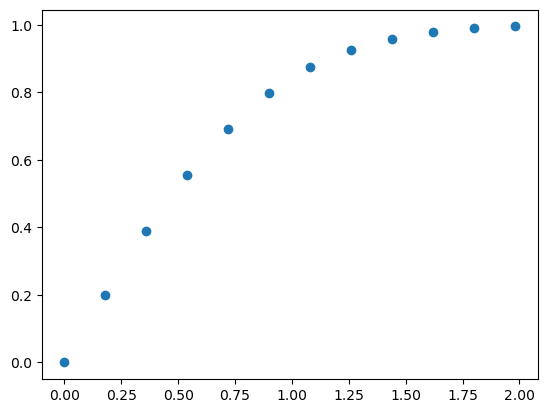

In [43]:
plt.scatter(indices[::1000//11], f_vals[::1000//11])
pd.DataFrame(indices[::1000//11], f_vals[::1000//11], columns=["erf(x)"]).rename_axis("x")  

# Интерполирование по равномерным узлам

,L(x)
x,
0.000000,0.000000
0.222920,0.200200
0.428777,0.400400
0.604329,0.600601
0.742577,0.800801
0.843116,1.001001
0.910635,1.201201
0.952507,1.401401
0.976488,1.601602


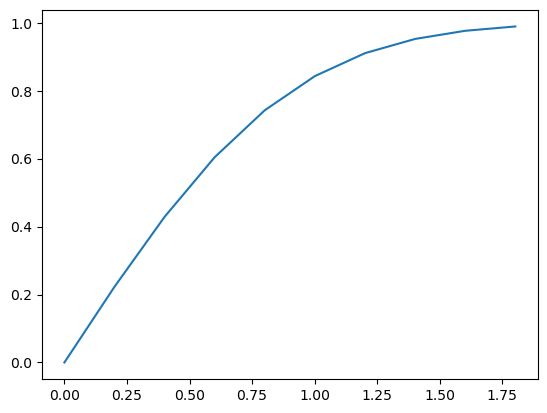

In [44]:
m = 10
lag_vals = [lagrange(x, f_vals[::1000//m], indices[::1000//m]) for x in indices]
plt.plot(indices[::1000//m], lag_vals[::1000//m])
pd.DataFrame(indices[::1000//m], lag_vals[::1000//m], columns=["L(x)"]).rename_axis("x")

ϵ = 5.78e-05


,ϵ(x)
x,
1.397218e-06,0.100100
3.123028e-07,0.300300
1.425764e-07,0.500501
8.137838e-08,0.700701
4.284474e-09,0.900901
4.958401e-08,1.101101
3.104345e-07,1.301301
4.411672e-07,1.501502
3.181555e-06,1.701702


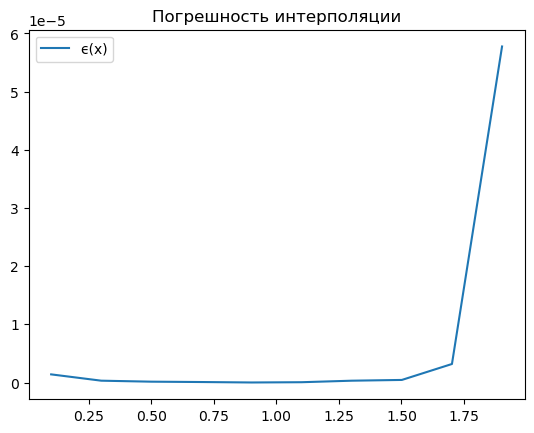

In [45]:
delta = [abs(lag_vals[x] - f_vals[x]) for x in range(500//m, len(indices), 1000//m)]
plt.plot(indices[500//m::1000//m], delta, label="ϵ(x)")
plt.legend()
plt.title("Погрешность интерполяции")

print(f'ϵ = {float(max(delta)):.2e}')
pd.DataFrame(indices[500//m::1000//m], delta, columns=["ϵ(x)"]).rename_axis("x")

# Эксперимент c равномерными узлами
Узлов стало на $22$ больше, итого $11$ -> $23$

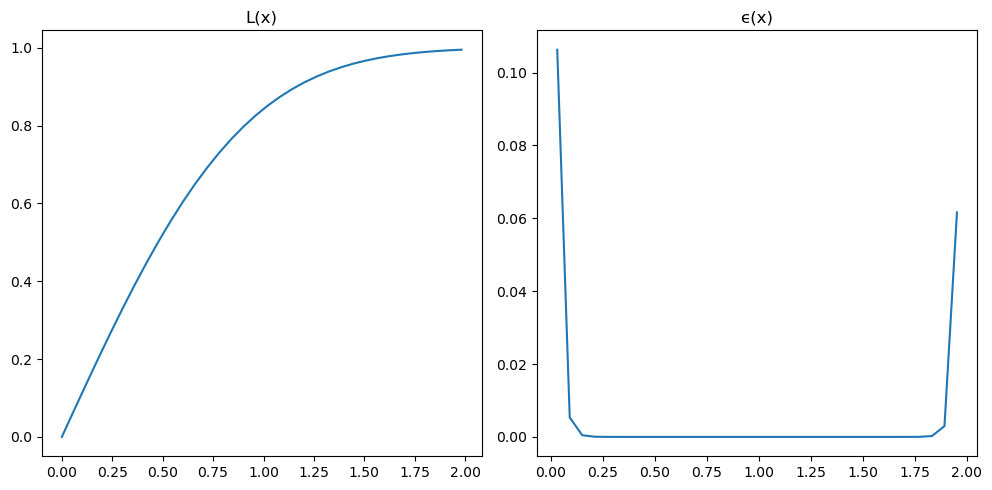

Максимальная погрешность:
ϵ = 1.06e-01


In [46]:
m = 33
lag_vals = [lagrange(x, f_vals[::1000//m], indices[::1000//m]) for x in indices]
delta = [abs(lag_vals[x] - f_vals[x]) for x in range(500//m, len(indices), 1000//m)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(indices[::1000//m], lag_vals[::1000//m])
axes[0].set_title("L(x)")

axes[1].plot(indices[500//m::1000//m], delta)
axes[1].set_title("ϵ(x)")

plt.tight_layout()
plt.show()

print('Максимальная погрешность:')
print(f'ϵ = {float(max(delta)):.2e}')

# Интерполяция по узлам Чебышева

ϵ = 1.87e-05


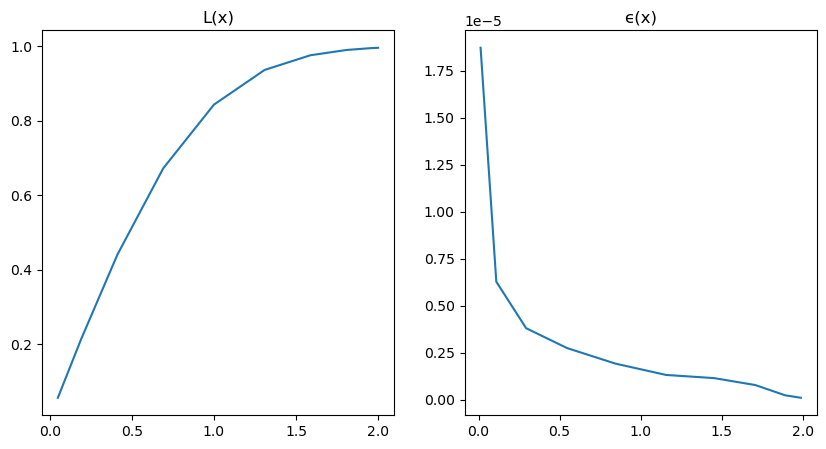

In [47]:
m = 10
lag_vals = [lagrange(x, f_vals_cheb[::1000//m], chebs[::1000//m]) for x in chebs]
delta = [abs(lag_vals[x] - f_vals_cheb[x]) for x in range(500//m, len(chebs), 1000//m)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(chebs[::1000//m], lag_vals[::1000//m])
axes[0].set_title("L(x)")
axes[1].plot(chebs[500//m::1000//m], delta)
axes[1].set_title("ϵ(x)")
print(f'ϵ = {float(max(delta)):.2e}')

# Эксперимент с узлами Чебышева
Узлов стало на $489$ больше, итого $11$ -> $500$

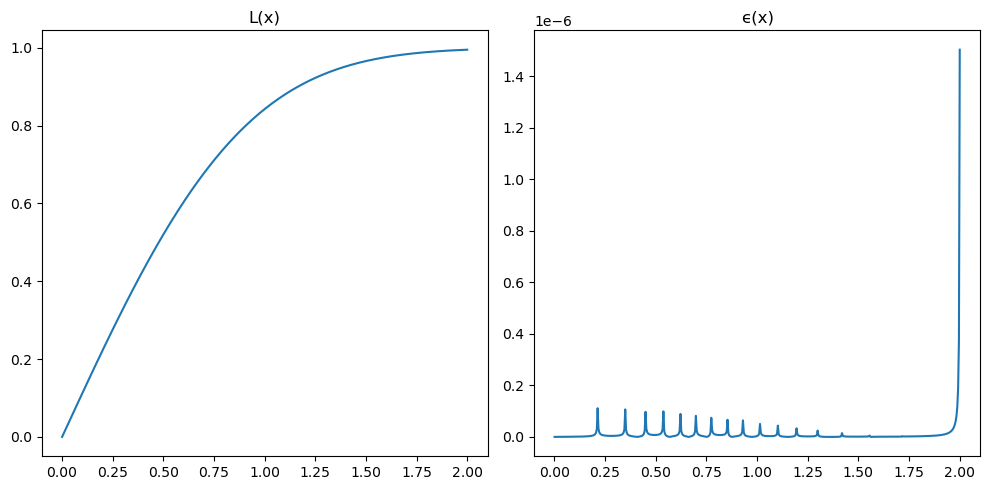

Максимальная погрешность:
ϵ = 1.50e-06


In [48]:
m = 500
lag_vals = [lagrange(x, f_vals_cheb[::1000//m], chebs[::1000//m]) for x in chebs]
delta = [abs(lag_vals[x] - f_vals_cheb[x]) for x in range(500//m, len(chebs), 1000//m)]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(chebs[::1000//m], lag_vals[::1000//m])
axes[0].set_title("L(x)")

axes[1].plot(indices[500//m::1000//m], delta)
axes[1].set_title("ϵ(x)")

plt.tight_layout()
plt.show()

print('Максимальная погрешность:')
print(f'ϵ = {float(max(delta)):.2e}')